# Ejemplo con dataset de flores y agrupación aglomerativa



In [52]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [53]:
# Cargamos dataset Iris
iris = load_iris()

#Extraer los datos (medidas de las flores)
iris_data = iris.data

# Mostramos tabla con los datos
iris_data_pd = pd.DataFrame(iris_data, columns=iris.feature_names)
iris_data_pd['species'] = pd.Categorical.from_codes(iris.target, iris.target_names) # Establecemos correlación entre número de etiqueta y nombre de columnas
iris_data_pd

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [54]:
# Vamos a trabajar con las columnas 3 y 4 (tamaño de los pétalos)
datos_petalos = iris_data_pd.iloc[:, 2:4]
datos_petalos

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [4]:
iris.target_names # Tipos de flores

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

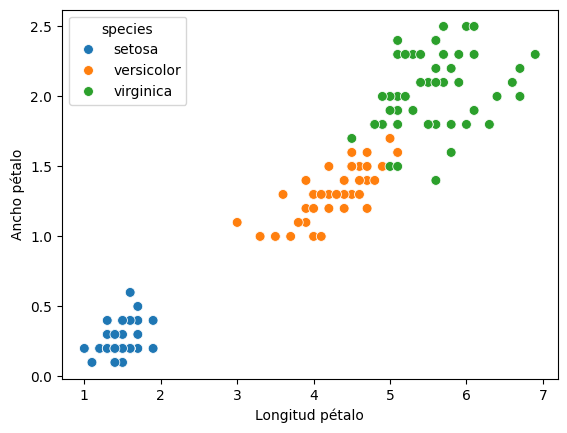

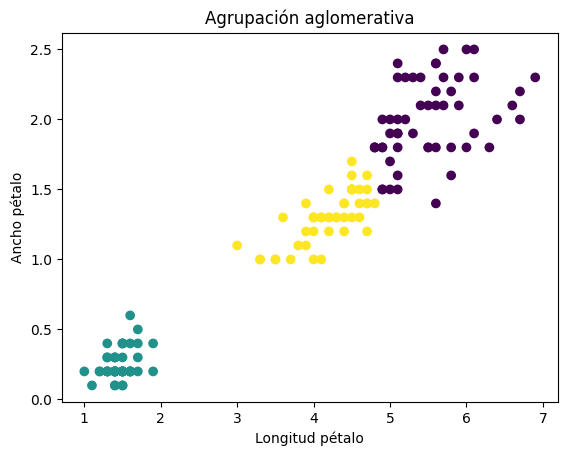

In [66]:
import seaborn as sns

agglo = AgglomerativeClustering(n_clusters=3, linkage="ward")
agglo.fit(iris_data_pd.iloc[:, 2:4]) # Clustering sobre 2 dimensiones (solo tiene en cuenta pétalos)

plt.figure(0)
sns.scatterplot(
    s=50,
    data=iris_data_pd,
    x='petal length (cm)',
    y='petal width (cm)',
    hue='species'  # Columna donde está la etiqueta de cada punto
)
plt.xlabel("Longitud pétalo")
plt.ylabel("Ancho pétalo")

plt.show()

plt.figure(1)
plt.scatter(datos_petalos.iloc[:,0], datos_petalos.iloc[:,1], c=agglo.labels_)
plt.xlabel("Longitud pétalo")
plt.ylabel("Ancho pétalo")
plt.title("Agrupación aglomerativa")

plt.show()



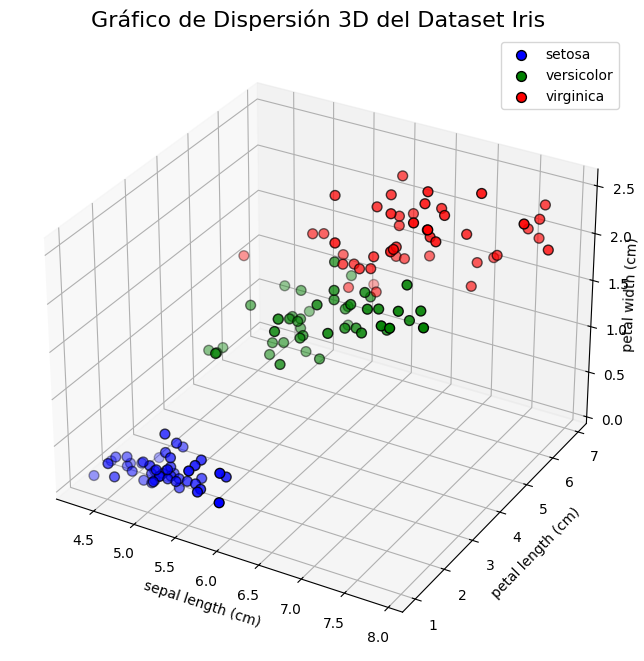

In [64]:
# 1. Importar las bibliotecas necesarias
from mpl_toolkits.mplot3d import Axes3D  # Importación específica para gráficos 3D


# 3. Preparar la figura y los ejes 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 4. Definir los colores para cada especie
# Usaremos un mapa de colores para asignar un color a cada clase (0, 1, 2)
colors = ['blue', 'green', 'red']
# También podrías usar un colormap: plt.cm.jet(y / np.max(y))

# 5. Dibujar los puntos para cada especie en un bucle
# Esto nos permite asignar una etiqueta a cada grupo de puntos para la leyenda
for i in range(len(iris.target_names)):
    # Seleccionamos los datos correspondientes a cada clase
    ax.scatter(
        iris.data[iris.target == i, 0],  # Característica 1 en el eje X (sepal length)
        iris.data[iris.target == i, 2],  # Característica 3 en el eje Y (petal length)
        iris.data[iris.target == i, 3],  # Característica 4 en el eje Z (petal width)
        c=colors[i],
        label=iris.target_names[i],
        s=50, # Tamaño del punto
        edgecolor='k' # Color del borde del punto
    )

# 6. Añadir etiquetas a los ejes y un título
ax.set_title("Gráfico de Dispersión 3D del Dataset Iris", fontsize=16)
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[2])
ax.set_zlabel(iris.feature_names[3], labelpad=-4)

# 7. Añadir la leyenda
ax.legend()

# 8. Mostrar el gráfico
plt.show()

In [73]:
agglo.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

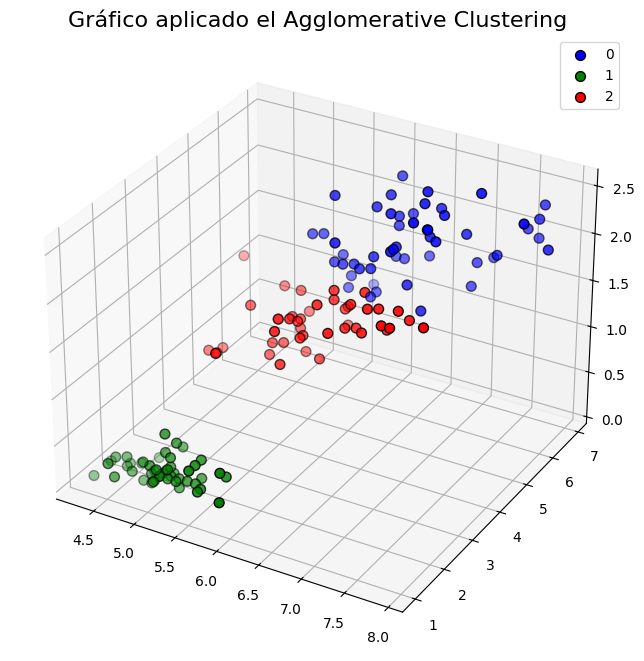

In [83]:
# 3. Preparar la figura y los ejes 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 4. Definir los colores para cada especie
# Usaremos un mapa de colores para asignar un color a cada clase (0, 1, 2)
colors = ['blue', 'green', 'red']
# También podrías usar un colormap: plt.cm.jet(y / np.max(y))

unique_labels = np.unique(agglo.labels_)

# 5. Dibujar los puntos para cada especie en un bucle
# Esto nos permite asignar una etiqueta a cada grupo de puntos para la leyenda
for i in unique_labels:
    cluster_mask = (agglo.labels_ == i)
    # Seleccionamos los datos correspondientes a cada clase
    ax.scatter(
        iris.data[cluster_mask, 0],  # Característica 1 en el eje X (sepal length)
        iris.data[cluster_mask, 2],  # Característica 3 en el eje Y (petal length)
        iris.data[cluster_mask, 3],  # Característica 4 en el eje Z (petal width)
        c=colors[i],
        label=i,
        s=50, # Tamaño del punto
        edgecolor='k' # Color del borde del punto
    )

# 6. Añadir etiquetas a los ejes y un título
ax.set_title("Gráfico aplicado el Agglomerative Clustering", fontsize=16)

# 7. Añadir la leyenda
ax.legend()

# 8. Mostrar el gráfico
plt.show()

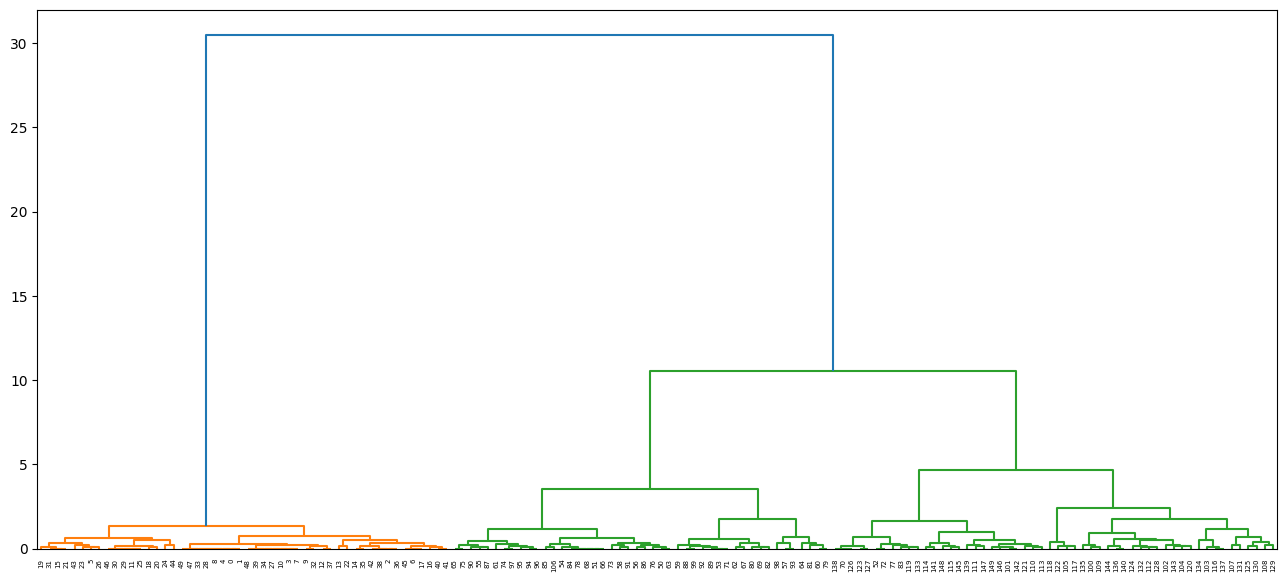

In [78]:
from scipy.cluster import hierarchy

h = hierarchy.linkage(iris_data_pd.iloc[:, 2:4], method='ward')
plt.figure(figsize=(16, 7))
dh = hierarchy.dendrogram(h)
plt.show()

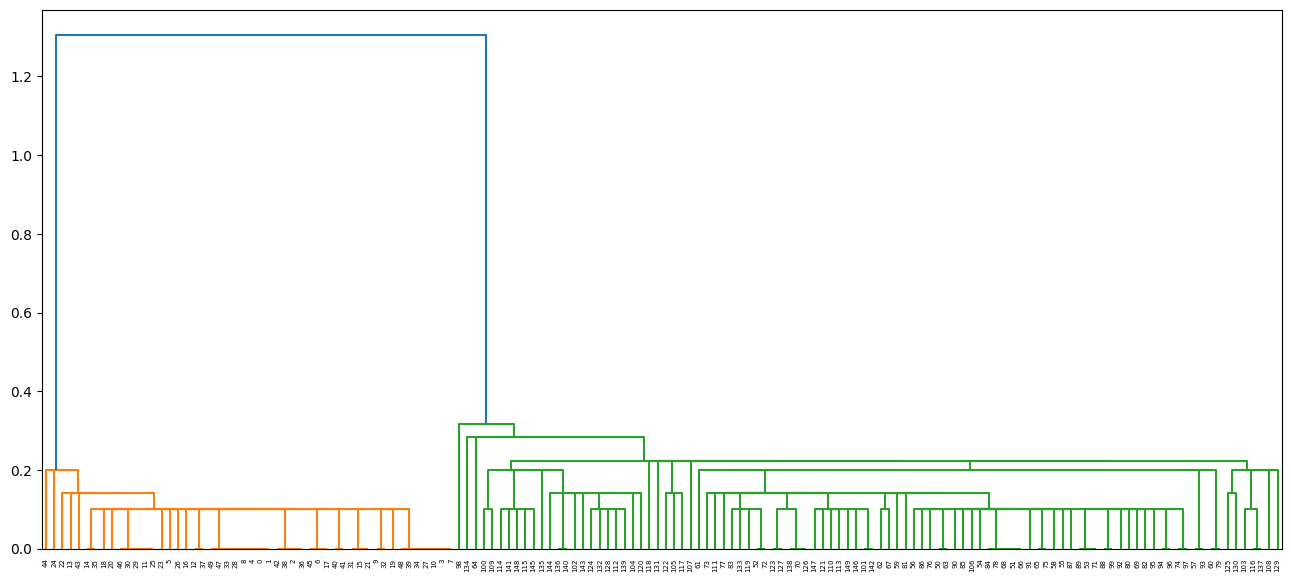

In [84]:
h = hierarchy.linkage(iris_data_pd.iloc[:, 2:4], method='single')
plt.figure(figsize=(16, 7))
dh = hierarchy.dendrogram(h)
plt.show()

## Comparamos clasificación real con algoritmo de agrupación aglomerativa

In [95]:
X = iris_data_pd.drop(columns=['species']) # Solo datos (quitamos columna de especie)
Y = iris_data_pd['species'] # Sólo la columna de especie (etiquetas)
iris_data_pd.head() # Mostramos las primeras líneas del dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [101]:
agglo2 = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage="complete")
# Ajustamos el modelo a nuestros datos seleccionados (longitud y anchura del pétalo).
agglo2.fit(X.iloc[:, 2:4])

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [102]:
# Cuantas flores de cada tipo están agrupadas en el cluster 0
case0 = Y[agglo2.labels_==0] #
print(case0.value_counts())

species
virginica     49
versicolor     5
setosa         0
Name: count, dtype: int64


In [103]:
# Cuantas flores de cada tipo están agrupadas en el cluster 1
case1 = Y[agglo2.labels_==1] #
print(case1.value_counts())

species
versicolor    45
virginica      1
setosa         0
Name: count, dtype: int64


In [104]:
# Cuantas flores de cada tipo están agrupadas en el cluster 1
case2 = Y[agglo2.labels_==2] #
print(case2.value_counts())

species
setosa        50
versicolor     0
virginica      0
Name: count, dtype: int64


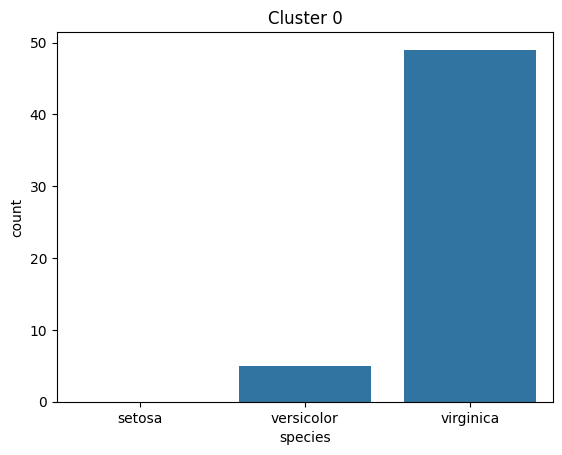

In [105]:
sns.countplot(x=case0).set_title("Cluster 0")
plt.show()

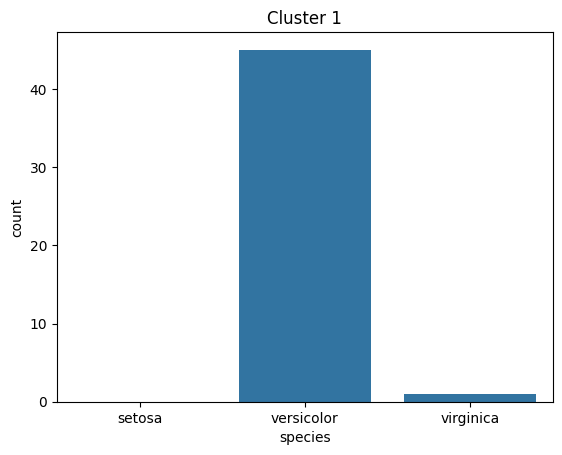

In [107]:
sns.countplot(x=case1).set_title("Cluster 1")
plt.show()

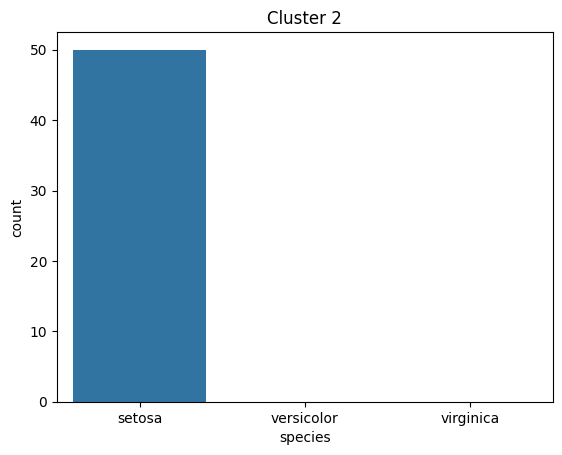

In [108]:
sns.countplot(x=case2).set_title("Cluster 2")
plt.show()